# Project 8 - Data Wrangling for Twitter - WeRateDog Data

This is a project for Udacity Data Analyst Nanodegree Lesson8.

### Part 0- Importing required packages
The following are the python packages required for this project:
- pandas
- numPy
- matplotlib
- requests
- tweepy
- json
- seaborn (optional)

**note: install Tweepy on Anaconda**
- https://stackoverflow.com/questions/18675907/how-to-run-conda
- https://anaconda.org/conda-forge/tweepy


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import tweepy
import json
import requests
import os
from datetime import datetime

### Part 1- Gathering Data
There are 3 sources of gathering the data needed for this project:
- 1- [manually] WeRateDogs' Twitter archive - `twitter-archive-enhanced.csv` provided by Udacity - gathered by manually downloading it
- 2- [programmatically] Tweet image predictions - `image_predictions.tsv` created by Udacity - gathered using `request()` function in Python
- 3- [programmatically] WeRateDogs Twitter data - `tweet_json.txt` - gathered using Tweepy, Twitter API

In [2]:
# 1-1: WeRateDogs Twitter Archive
wrd = pd.read_csv('twitter-archive-enhanced.csv')
wrd.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [3]:
wrd.shape[0]

2356

In [4]:
# 1-2 (1) Using Request to get all the tsv data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
# 1-2 (2) using the `with open() as file` to store http response into a file
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:
# 1-2 (3) check if the tsv file is successfully generated in the folder
os.listdir()

['.DS_Store',
 '.ipynb_checkpoints',
 'image-predictions.tsv',
 'Other',
 'tweet_json.txt',
 'twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'wrangle_act.ipynb']

In [7]:
# 1-2 (4) read tsv file using Pandas
prediction = pd.read_csv('image-predictions.tsv', sep='\t')
prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

### Reference
- http://tweepy.readthedocs.io/en/v3.6.0/api.html#status-methods
- Retweeters of a Twitter status in Tweepy: https://stackoverflow.com/questions/17724988/retweeters-of-a-twitter-status-in-tweepy
- How to Generate API Key, Consumer Token, Access Key for Twitter OAuth: https://themepacific.com/how-to-generate-api-key-consumer-token-access-key-for-twitter-oauth/994/
- How do I check whether a file exists? https://stackoverflow.com/questions/82831/how-do-i-check-whether-a-file-exists

In [8]:
# 1-3: Using Tweepy to get Tweeter retweet datas, Twitter API.
# 1-3 (1) set auth keys, secret

# https://apps.twitter.com/app/15689954/keys
#  =============== Do not submit ===============
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''
# =============== Do not submit ===============

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

- How to append in a json file in Python: 
https://stackoverflow.com/questions/18980039/how-to-append-in-a-json-file-in-python
-  Create an empty file: 
https://knowledge.safe.com/questions/22864/startup-python-script-how-can-i-create-an-empty-fi.html
- How to dynamically build a JSON object with Python?:
https://stackoverflow.com/questions/23110383/how-to-dynamically-build-a-json-object-with-python
- Python - Appending JSON object to exisiting JSON object:
https://stackoverflow.com/questions/42078161/python-appending-json-object-to-exisiting-json-object
- how to add element to json list - python:
https://stackoverflow.com/questions/30350450/how-to-add-element-to-json-list-python/30350531
- Python Programming/Exceptions: 
https://en.wikibooks.org/wiki/Python_Programming/Exceptions
- Convert Tweepy Status object into JSON:
https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json
- Read a File Line-by-Line in Python: 
http://stackabuse.com/read-a-file-line-by-line-in-python/
- Official Input output Documentation:
https://docs.python.org/2/tutorial/inputoutput.html
- Python JSON dump / append to .txt with each variable on new line:
https://stackoverflow.com/questions/17055117/python-json-dump-append-to-txt-with-each-variable-on-new-line

- Using the tweet IDs in the WeRateDogs Twitter archive
- Query the Twitter API for each tweet's JSON data using Python's Tweepy library
- Store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
- Each tweet's JSON data should be written to its own line. 
- Read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [9]:
# tw_id = wrd.copy()
# filename = 'tweet_json.txt'
# v = '892420643555336193'

# # get status using Tweepy, Twitter API
# results = api.get_status(v)

# # convert status object to json string
# json_str = json.dumps(results._json)
# # json_str = json.dumps(results._json, indent=2)

# # convert str to byte object
# # json_str = str.encode(json_str)

# with open(filename, 'r+') as f:
#     f.write(json_str + '\n')

In [ ]:
# tw_id = wrd.copy()
# filename = 'tweet_json.txt'
# error = []
# for i,v in enumerate(tw_id['tweet_id']):
#     try:
#         # get status using Tweepy, Twitter API
#         results = api.get_status(v, tweet_mode='extended')

#         # convert status object to json string
#         json_str = json.dumps(results._json)

#         # convert str to byte object
#         # json_str = str.encode(json_str)

#         with open(filename, 'r+') as f:
#             f.write(json_str + '\n')
#     except:
#         error.append(v)
#         pass

In [11]:
tw_id = wrd.copy()
filename = 'tweet_json.txt'

In [9]:
if not os.path.exists(filename): 
    with open(filename, 'w') as f:
        data = {}
        data = {'0':{'id':'0','retweet': '0', 'favorite' : '0'}}
        json.dump(data, f)
    f.closed
    
for i,v in enumerate(tw_id['tweet_id']):
    try:
        results = api.get_status(v)
    except:
        pass

    tweet_json = {str(i) : {'id': str(v),'retweet': results.retweet_count, 'favorite' : results.favorite_count}}

    with open(filename) as fa:
        old_data = json.load(fa)    
    data.update(tweet_json)

    with open(filename, 'w') as out:
        json.dump(data, out, indent=2)
    out.closed
print("success get retweet data")

success get retweet data


In [12]:
wrd_api = pd.read_json(filename)
wrd_api

0                   1                   10    \
favorite               38596               33092               30545   
id        892420643555336192  892177421306343424  890006608113172480   
retweet                 8531                6274                7343   

                        100                 1000                1001  \
favorite               14714                6210                7098   
id        872820683541237760  747963614829678592  747933425676525568   
retweet                 3719                2362                2796   

                        1002                1003                1004  \
favorite                3162                3006                5195   
id        747885874273214464  747844099428986880  747816857231626240   
retweet                 1090                 819                1276   

                        1005         ...                        990   \
favorite                1475         ...                        2964   
id        747651430853525504         ...          748705597323898880   
retweet                  172         ...                        1036   

                        991                 992                 993   \
favorite                5084                4542                6507   
id        748699167502000128  748692773788876800  748575535303884800   
retweet                 1759                1457                2188   

                        994                 995                 996   \
favorite                2331                5595                8249   
id        748568946752774144  748346686624440320  748337862848962560   
retweet                  734                1352                4525   

                        997                 998                 999   
favorite                3975                3931               15109  
id        748324050481647616  748307329658011648  748220828303695872  
retweet                  841                 785                8540  

[3 rows x 2356 columns]

### Part 2- Assessing Data

#### Visual Assessment

In [13]:
wrd

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [14]:
prediction

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [15]:
wrd_api

0                   1                   10    \
favorite               38596               33092               30545   
id        892420643555336192  892177421306343424  890006608113172480   
retweet                 8531                6274                7343   

                        100                 1000                1001  \
favorite               14714                6210                7098   
id        872820683541237760  747963614829678592  747933425676525568   
retweet                 3719                2362                2796   

                        1002                1003                1004  \
favorite                3162                3006                5195   
id        747885874273214464  747844099428986880  747816857231626240   
retweet                 1090                 819                1276   

                        1005         ...                        990   \
favorite                1475         ...                        2964   
id        747651430853525504         ...          748705597323898880   
retweet                  172         ...                        1036   

                        991                 992                 993   \
favorite                5084                4542                6507   
id        748699167502000128  748692773788876800  748575535303884800   
retweet                 1759                1457                2188   

                        994                 995                 996   \
favorite                2331                5595                8249   
id        748568946752774144  748346686624440320  748337862848962560   
retweet                  734                1352                4525   

                        997                 998                 999   
favorite                3975                3931               15109  
id        748324050481647616  748307329658011648  748220828303695872  
retweet                  841                 785                8540  

[3 rows x 2356 columns]

#### Progammatic Assessment

-  wrd archive

In [16]:
wrd.sample(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
870   761672994376806400                    NaN                  NaN   
1918  674271431610523648                    NaN                  NaN   
448   819006400881917954                    NaN                  NaN   

                      timestamp  \
870   2016-08-05 21:19:27 +0000   
1918  2015-12-08 16:56:51 +0000   
448   2017-01-11 02:21:57 +0000   

                                                 source  \
870   <a href="http://twitter.com/download/iphone" r...   
1918  <a href="http://twitter.com/download/iphone" r...   
448   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
870   Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...                  NaN   
1918  "AT DAWN, WE RIDE"\n10/10 for both dogs https:...                  NaN   
448   This is Sunny. She was also a very good First ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
870                        NaN                        NaN   
1918                       NaN                        NaN   
448                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
870   https://twitter.com/dog_rates/status/761672994...                10   
1918  https://twitter.com/dog_rates/status/674271431...                10   
448   https://twitter.com/dog_rates/status/819006400...                14   

      rating_denominator   name  doggo floofer pupper puppo  
870                   10   None   None    None   None  None  
1918                  10   None   None    None   None  None  
448                   10  Sunny  doggo    None   None  None

In [17]:
wrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
wrd['name'].value_counts()[:10]

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Tucker      10
Penny       10
Lola        10
Bo           9
Name: name, dtype: int64

In [19]:
wrd['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

-  prediction

In [20]:
prediction.sample(3)

tweet_id                                          jpg_url  \
1029  711008018775851008  https://pbs.twimg.com/media/Cd4CBQFW8AAY3ND.jpg   
2047  886736880519319552  https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
1045  712809025985978368  https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg   

      img_num                  p1   p1_conf  p1_dog              p2   p2_conf  \
1029        1      French_bulldog  0.731405    True     Boston_bull  0.150672   
2047        1              kuvasz  0.309706    True  Great_Pyrenees  0.186136   
1045        1  Labrador_retriever  0.868671    True          carton  0.095095   

      p2_dog              p3   p3_conf  p3_dog  
1029    True             pug  0.021811    True  
2047    True  Dandie_Dinmont  0.086346    True  
1045   False             pug  0.007651    True

In [21]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
prediction.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [23]:
prediction['p1'].value_counts()[:10]

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
malamute               30
Name: p1, dtype: int64

-  wrd api

In [24]:
wrd_api.sample(3)

0                   1                   10    \
id        892420643555336192  892177421306343424  890006608113172480   
retweet                 8531                6274                7343   
favorite               38596               33092               30545   

                        100                 1000                1001  \
id        872820683541237760  747963614829678592  747933425676525568   
retweet                 3719                2362                2796   
favorite               14714                6210                7098   

                        1002                1003                1004  \
id        747885874273214464  747844099428986880  747816857231626240   
retweet                 1090                 819                1276   
favorite                3162                3006                5195   

                        1005         ...                        990   \
id        747651430853525504         ...          748705597323898880   
retweet                  172         ...                        1036   
favorite                1475         ...                        2964   

                        991                 992                 993   \
id        748699167502000128  748692773788876800  748575535303884800   
retweet                 1759                1457                2188   
favorite                5084                4542                6507   

                        994                 995                 996   \
id        748568946752774144  748346686624440320  748337862848962560   
retweet                  734                1352                4525   
favorite                2331                5595                8249   

                        997                 998                 999   
id        748324050481647616  748307329658011648  748220828303695872  
retweet                  841                 785                8540  
favorite                3975                3931               15109  

[3 rows x 2356 columns]

In [25]:
wrd_api.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, favorite to retweet
Columns: 2356 entries, 0 to 999
dtypes: int64(2356)
memory usage: 55.2+ KB


#### Quality Issues >>

##### wrd archive
- There are 55 status having incorrect name: "a", "an"
- Some entries has the wrong expanded_urls - "gofundme.com" instead of "twitter.com"
- There are 59 status missing "expanded_urls"
- Change all the null values to be NaN in 'name' column
- Change all the null values to be  NaN in 'doggo' column
- Change all the null values to be  NaN in 'floofer' column
- Change all the null values to be  NaN in 'pupper' column
- Change all the null values to be  NaN in 'puppo' column

##### prediction
- Some of the prediction results starts with capital letters. e.g. Labrador_retriever

#### Tidiness Issues >>
##### wrd archive
- doggo, floofer, pupper, puppo should be in the same column -- type

##### wrd_api
- Convert columns into rows 

### Part 3- Cleaning Data

####  ============== Quality ==============

(1) There are 55 status having incorrect name: "a", "an"

#### Define

Replace "a" or "an" with proper name or null

#### Code

In [26]:
wrd.query('name == "a"')['text']

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
1004    Viewer discretion is advised. This is a terrib...
1017    This is a carrot. We only rate dogs. Please on...
1049    This is a very rare Great Alaskan Bush Pupper....
1193    People please. This is a Deadly Mediterranean ...
1207    This is a taco. We only rate dogs. Please only...
1340    Here is a heartbreaking scene of an incredible...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1361    This is a Butternut Cumberfloof. It's not wind...
1368    This is a Wild Tuscan Poofwiggle. Careful not ...
1382    "Pupper is a present to world. Here is a bow f...
1499    This is a rare Arctic Wubberfloof. Unamused by...
1737    Guys this really needs to stop. We've been ove...
1785    This is a dog swinging. I really enjoyed it so...
1853    This i

In [27]:
wrd.query('name == "an"')['text']

759     RT @dog_rates: This is an East African Chalupa...
1025    This is an Iraqi Speed Kangaroo. It is not a d...
1362    This is an East African Chalupa Seal. We only ...
2204    This is an Irish Rigatoni terrier named Berta....
2333    This is an extremely rare horned Parthenon. No...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2349    This is an odd dog. Hard on the outside but lo...
Name: text, dtype: object

From the above, we can see that status with the name "a" or "an" are for those status without names.
Let's change them to NaN.

In [28]:
wrd_clean = wrd.copy()
wrd_clean['name'] = wrd_clean['name'].apply(lambda x: 'NaN' if x == "a" else x)
wrd_clean['name'] = wrd_clean['name'].apply(lambda x: 'NaN' if x == "an" else x)

#### Test

In [29]:
wrd_clean.query('name == "a"')

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [30]:
wrd_clean.query('name == "an"')

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

(2) some entry has the wrong expanded_urls - "gofundme.com" instead of "twitter.com"

(3) There are 59 status missing "expanded_urls"

#### Define

- Fill all the NaN with "https://twitter.com/dog_rates/status/.../" urls
- Replace "godfundme" with "https://twitter.com/dog_rates/status/.../" urls

#### Code

In [31]:
wrd_clean['expanded_urls'][0]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [32]:
wrd_clean['expanded_urls'] = wrd_clean['tweet_id'].apply(lambda x: 'https://twitter.com/dog_rates/status/'+str(x)+'/photo/1')

#### Test

In [33]:
wrd_clean['expanded_urls'].isnull().sum()

0

In [34]:
wrd_clean['expanded_urls'].str.contains('https://gofundme.com/').sum()

0

In [35]:
wrd_clean['expanded_urls'].str.contains('https://www.gofundme.com/').sum()

0

(4) null values should be NaN in 'name' column

#### Define

Change all `None` values to `NaN` in 'name' column

#### Code

In [36]:
wrd_clean['name'].value_counts()[:10]

None       745
NaN         62
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Penny       10
Tucker      10
Lola        10
Bo           9
Name: name, dtype: int64

In [37]:
wrd_clean['name'] = wrd_clean['name'].apply(lambda x: 'NaN' if x == "None" else x)

#### Test

In [38]:
wrd_clean['name'].value_counts()[:10]

NaN        807
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Tucker      10
Penny       10
Lola        10
Bo           9
Winston      9
Name: name, dtype: int64

(5) Change all the null values to be  NaN in 'doggo' column

#### Define

Change all `None` values to `NaN` in 'doggo' column

#### Code

In [39]:
wrd_clean['doggo'].value_counts()[:10]

None     2259
doggo      97
Name: doggo, dtype: int64

In [40]:
wrd_clean['doggo'] = wrd_clean['doggo'].apply(lambda x: 'NaN' if x == "None" else x)

#### Test

In [41]:
wrd_clean['doggo'].value_counts()[:10]

NaN      2259
doggo      97
Name: doggo, dtype: int64

(6) Change all the null values to be  NaN in 'floofer' column

#### Define

Change all `None` values to `NaN` in 'floofer' column

#### Code

In [42]:
wrd_clean['floofer'].value_counts()[:10]

None       2346
floofer      10
Name: floofer, dtype: int64

In [43]:
wrd_clean['floofer'] = wrd_clean['floofer'].apply(lambda x: 'NaN' if x == "None" else x)

#### Test

In [44]:
wrd_clean['floofer'].value_counts()[:10]

NaN        2346
floofer      10
Name: floofer, dtype: int64

(7) Change all the null values to be  NaN in 'pupper' column

#### Define

Change all `None` values to `NaN` in 'pupper' column

#### Code

In [45]:
wrd_clean['pupper'].value_counts()[:10]

None      2099
pupper     257
Name: pupper, dtype: int64

In [46]:
wrd_clean['pupper'] = wrd_clean['pupper'].apply(lambda x: 'NaN' if x == "None" else x)

#### Test

In [47]:
wrd_clean['pupper'].value_counts()[:10]

NaN       2099
pupper     257
Name: pupper, dtype: int64

(8) Change all the null values to be  NaN in 'puppo' column

#### Define

Change all `None` values to `NaN` in 'puppo' column

#### Code

In [48]:
wrd_clean['puppo'].value_counts()[:10]

None     2326
puppo      30
Name: puppo, dtype: int64

In [49]:
wrd_clean['puppo'] = wrd_clean['puppo'].apply(lambda x: 'NaN' if x == "None" else x)

#### Test

In [50]:
wrd_clean['puppo'].value_counts()[:10]

NaN      2326
puppo      30
Name: puppo, dtype: int64

(9) Some of the prediction results starts with capital letters. e.g. Labrador_retriever

#### Define

Change all the letters in prediction to lower case

#### Code

In [51]:
prediction['p1'][:10]

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
5      Bernese_mountain_dog
6                box_turtle
7                      chow
8             shopping_cart
9          miniature_poodle
Name: p1, dtype: object

In [52]:
prediction_clean = prediction.copy()
prediction_clean['p1'] = prediction_clean['p1'].apply(lambda x: x.lower())
prediction_clean['p2'] = prediction_clean['p2'].apply(lambda x: x.lower())
prediction_clean['p3'] = prediction_clean['p3'].apply(lambda x: x.lower())

#### Test

In [53]:
prediction_clean['p1']

0            welsh_springer_spaniel
1                           redbone
2                   german_shepherd
3               rhodesian_ridgeback
4                miniature_pinscher
5              bernese_mountain_dog
6                        box_turtle
7                              chow
8                     shopping_cart
9                  miniature_poodle
10                 golden_retriever
11                    gordon_setter
12                     walker_hound
13                              pug
14                       bloodhound
15                            lhasa
16                   english_setter
17                              hen
18                 desktop_computer
19                italian_greyhound
20                      maltese_dog
21                 three-toed_sloth
22                               ox
23                 golden_retriever
24                         malamute
25                       guinea_pig
26      soft-coated_wheaten_terrier
27                        ch

In [54]:
prediction_clean['p2']

0                         collie
1             miniature_pinscher
2                       malinois
3                        redbone
4                     rottweiler
5               english_springer
6                     mud_turtle
7                tibetan_mastiff
8                shopping_basket
9                       komondor
10               tibetan_mastiff
11             yorkshire_terrier
12              english_foxhound
13                  bull_mastiff
14               german_shepherd
15                      shih-tzu
16                  newfoundland
17                          cock
18                          desk
19                   toy_terrier
20                    toy_poodle
21                         otter
22                  newfoundland
23      chesapeake_bay_retriever
24                siberian_husky
25                         skunk
26                  afghan_hound
27                   toy_terrier
28                    bloodhound
29                    barracouta
          

In [55]:
prediction_clean['p3']

0                 shetland_sheepdog
1               rhodesian_ridgeback
2                        bloodhound
3                miniature_pinscher
4                          doberman
5        greater_swiss_mountain_dog
6                          terrapin
7                          fur_coat
8                  golden_retriever
9       soft-coated_wheaten_terrier
10               labrador_retriever
11                         pekinese
12                     ibizan_hound
13                   french_bulldog
14                         malinois
15                   dandie_dinmont
16                           borzoi
17                        partridge
18                         bookcase
19                          basenji
20                 miniature_poodle
21                   great_grey_owl
22                      groenendael
23               labrador_retriever
24                       eskimo_dog
25                          hamster
26                           briard
27                         p

####  ============== Tidiness ==============

(1) wrd archive- doggo, floofer, pupper, puppo should be in the same column -- type

#### Define

Gather 'doggo', 'floofer', 'pupper', 'puppo' into a column: type

#### Code

In [56]:
wrd_tidy = wrd_clean.copy()
wrd_tidy['tmp1'] = wrd_tidy['doggo'].apply(lambda x: "doggo" if x == "doggo" else "")
wrd_tidy['tmp2'] = wrd_tidy['floofer'].apply(lambda x: "floofer" if x == "floofer" else "")
wrd_tidy['tmp3'] = wrd_tidy['pupper'].apply(lambda x: "pupper" if x == "pupper" else "")
wrd_tidy['tmp4'] = wrd_tidy['puppo'].apply(lambda x: "puppo" if x == "puppo" else "")
wrd_tidy['type'] = wrd_tidy['tmp1'] + wrd_tidy['tmp2'] + wrd_tidy['tmp3'] + wrd_tidy['tmp4']
wrd_tidy['type'] = wrd_tidy['type'].apply(lambda x: "NaN" if x == "" else x )
wrd_tidy.drop(['tmp1','tmp2','tmp3','tmp4', 'doggo', 'floofer', 'pupper', 'puppo'],inplace=True,axis=1)

#### Test

In [57]:
wrd_tidy['type'].value_counts()

NaN             1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: type, dtype: int64

(2) wrd_api- Convert columns into rows

#### Define

Transpose wrd_api dataframe

#### Code

In [58]:
wrd_api

0                   1                   10    \
favorite               38596               33092               30545   
id        892420643555336192  892177421306343424  890006608113172480   
retweet                 8531                6274                7343   

                        100                 1000                1001  \
favorite               14714                6210                7098   
id        872820683541237760  747963614829678592  747933425676525568   
retweet                 3719                2362                2796   

                        1002                1003                1004  \
favorite                3162                3006                5195   
id        747885874273214464  747844099428986880  747816857231626240   
retweet                 1090                 819                1276   

                        1005         ...                        990   \
favorite                1475         ...                        2964   
id        747651430853525504         ...          748705597323898880   
retweet                  172         ...                        1036   

                        991                 992                 993   \
favorite                5084                4542                6507   
id        748699167502000128  748692773788876800  748575535303884800   
retweet                 1759                1457                2188   

                        994                 995                 996   \
favorite                2331                5595                8249   
id        748568946752774144  748346686624440320  748337862848962560   
retweet                  734                1352                4525   

                        997                 998                 999   
favorite                3975                3931               15109  
id        748324050481647616  748307329658011648  748220828303695872  
retweet                  841                 785                8540  

[3 rows x 2356 columns]

In [59]:
wrd_api_clean = wrd_api.copy()
wrd_api_clean = wrd_api_clean.transpose().sort_index(ascending=True)
wrd_api_clean = wrd_api_clean[['id','favorite','retweet']]
wrd_api_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [60]:
wrd_api_clean

tweet_id  favorite  retweet
0     892420643555336192     38596     8531
1     892177421306343424     33092     6274
2     891815181378084864     24914     4156
3     891689557279858688     42013     8655
4     891327558926688256     40155     9412
5     891087950875897856     20133     3113
6     890971913173991424     11802     2074
7     890729181411237888     65227    18912
8     890609185150312448     27666     4272
9     890240255349198848     31798     7427
10    890006608113172480     30545     7343
11    889880896479866880     27657     4977
12    889665388333682688     47916    10071
13    889638837579907072     27052     4551
14    889531135344209920     15034     2238
15    889278841981685760     25174     5423
16    888917238123831296     28958     4502
17    888804989199671296     25472     4349
18    888554962724278272     19811     3585
19    888202515573088256     19811     3585
20    888078434458587136     21670     3492
21    887705289381826560     30051     5392
22    887517139158093824     46039    11669
23    887473957103951872     68815    18215
24    887343217045368832     33535    10398
25    887101392804085760     30403     5958
26    886983233522544640     34991     7770
27    886736880519319552     12018     3291
28    886680336477933568     22318     4458
29    886366144734445568     21101     3196
...                  ...       ...      ...
2326  666411507551481856       446      328
2327  666407126856765440       110       41
2328  666396247373291520       168       85
2329  666373753744588800       189       93
2330  666362758909284352       778      572
2331  666353288456101888       221       73
2332  666345417576210432       296      137
2333  666337882303524864       199       91
2334  666293911632134144       506      355
2335  666287406224695296       148       65
2336  666273097616637952       175       76
2337  666268910803644416       103       35
2338  666104133288665088     14322     6606
2339  666102155909144576        80       13
2340  666099513787052032       155       68
2341  666094000022159360       164       74
2342  666082916733198336       119       45
2343  666073100786774016       322      163
2344  666071193221509120       148       61
2345  666063827256086528       476      219
2346  666058600524156928       111       57
2347  666057090499244032       296      142
2348  666055525042405376       434      250
2349  666051853826850816      1217      849
2350  666050758794694656       133       58
2351  666049248165822464       108       41
2352  666044226329800704       299      141
2353  666033412701032448       125       44
2354  666029285002620928       130       47
2355  666020888022790144      2561      516

[2356 rows x 3 columns]

### Part 4- Insights & Visualization

#### Analysis

In [61]:
wrd_tidy.head(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

   rating_denominator     name type  
0                  10  Phineas  NaN  
1                  10    Tilly  NaN  
2                  10   Archie  NaN

In [62]:
prediction_clean.head(3)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         german_shepherd  0.596461    True            malinois   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    shetland_sheepdog  0.061428    True  
1  0.074192    True  rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True

In [63]:
wrd_api_clean.head(3)

tweet_id  favorite  retweet
0  892420643555336192     38596     8531
1  892177421306343424     33092     6274
2  891815181378084864     24914     4156

#### Insights

In [64]:
wrd_tidy['hour'] = wrd_tidy['timestamp'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S +0000").hour)

Q1: According to the data we have, when is more prefferable by WeRateDog's fans?

In [65]:
wrd_tidy2 = wrd_tidy.copy()
wrd_api_clean2 = wrd_api_clean.copy()
wrd_api_clean2.rename(columns={'tweet_id':'id'}, inplace=True)
wrd_full = pd.concat([wrd_tidy2, wrd_api_clean2], join = 'outer', axis=1)
wrd_full.drop(['id'],axis=1,inplace= True)
wrd_full.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name type  hour  favorite  retweet  
0                  10   Phineas  NaN    16     38596     8531  
1                  10     Tilly  NaN     0     33092     6274  
2                  10    Archie  NaN     0     24914     4156  
3                  10     Darla  NaN    15     42013     8655  
4                  10  Franklin  NaN    16     40155     9412

In [66]:
wrd_full['favorite'].describe()

count      2356.000000
mean       8030.370119
std       12126.142180
min           0.000000
25%        1463.750000
50%        3659.000000
75%        9446.250000
max      142629.000000
Name: favorite, dtype: float64

In [67]:
wrd_full.query('favorite > 9447')['hour'].value_counts()

0     110
16    105
1      79
17     61
18     41
15     34
23     32
19     23
22     23
2      23
20     19
21     18
3      13
4       3
5       2
13      1
6       1
14      1
Name: hour, dtype: int64

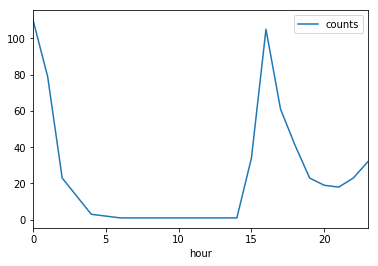

In [68]:
wrd_full.query('favorite > 9447')['hour'].value_counts().rename_axis('hour').reset_index(name='counts').sort_values(by=['hour']).plot(x="hour",y="counts");

> From the analysis, we know that it seems like top favorite posts happened in afternoon(16~17) and midnight(0~1).

Q2: What are the top predictions for the photo?

In [69]:
prediction_clean.p1.value_counts()[:20].rename_axis('prediction').reset_index(name='counts')

prediction  counts
0            golden_retriever     150
1          labrador_retriever     100
2                    pembroke      89
3                   chihuahua      83
4                         pug      57
5                        chow      44
6                     samoyed      43
7                  toy_poodle      39
8                  pomeranian      38
9                    malamute      30
10             cocker_spaniel      30
11             french_bulldog      26
12         miniature_pinscher      23
13   chesapeake_bay_retriever      23
14                  seat_belt      22
15            german_shepherd      20
16             siberian_husky      20
17  staffordshire_bullterrier      20
18                   cardigan      19
19                   web_site      19

From the above table, we know that top predictions for WeRateDog images are "golden_retriever", "labrador_retriever" and "pembroke".

Q3: Which year has more top posts? 2015, 2016, 2017?

In [70]:
wrd_full['year'] = wrd_full['timestamp'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S +0000").year)

In [71]:
wrd_full.groupby(['year'])['favorite'].mean()

year
2015     2318.933333
2016     6845.527473
2017    19091.571429
Name: favorite, dtype: float64

From the above, we know that 2017 has more top posts compare to 2015 and 2016.

In [72]:
wrd_full2 = wrd_full.copy()
prediction_clean3 = prediction_clean.copy()
wrd_prediction = wrd_full2.merge(prediction_clean3, on='tweet_id', how = 'left')
wrd_prediction.drop(['source','in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_timestamp','retweeted_status_user_id'],axis=1,inplace= True)
wrd_prediction.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name type  hour  favorite  ...    img_num  \
0                  10   Phineas  NaN    16     38596  ...        1.0   
1                  10     Tilly  NaN     0     33092  ...        1.0   
2                  10    Archie  NaN     0     24914  ...        1.0   
3                  10     Darla  NaN    15     42013  ...        1.0   
4                  10  Franklin  NaN    16     40155  ...        2.0   

            p1   p1_conf  p1_dog                  p2   p2_conf p2_dog  \
0       orange  0.097049   False               bagel  0.085851  False   
1    chihuahua  0.323581    True            pekinese  0.090647   True   
2    chihuahua  0.716012    True            malamute  0.078253   True   
3  paper_towel  0.170278   False  labrador_retriever  0.168086   True   
4       basset  0.555712    True    english_springer  0.225770   True   

                            p3   p3_conf p3_dog  
0                       banana  0.076110  False  
1                     papillon  0.068957   True  
2                       kelpie  0.031379   True  
3                      spatula  0.040836  False  
4  german_short-haired_pointer  0.175219   True  

[5 rows x 23 columns]

In [73]:
wrd_prediction.to_csv('twitter_archive_master.csv')

### Part 5- Conclusion

From the analysis, we find the most active hours for WeRateDog fans are 0~1 and 16~17. 

We also found the most popular dog types are "golden_retriever", "labrador_retriever" and "pembroke" according to the image prediction.

Finally, we know that in 2017, WeRateDog generate more top posts compared to previous years. 

### Part 6- Limitations

There are some limitations to the analysis:

- Completeness of the data:

There are still many null values in WeRateDog Archive, this may effect the aspects we can abalyze.

- Limitations of Twitter API

Some of the data we are interested cannot be found from that status data we get from Twitter API using Tweepy. For example, the data doesn't contains the amount of comments in each status.